In [12]:
# import the necessary packages
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import matplotlib.pyplot as plt
import numpy as np

# load model
model = hub.load('https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2')

In [7]:
# load image and convert to RGB format 
image = cv2.imread('./image.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# resize image to 512x512 pixels
image_resized = cv2.resize(image_rgb, (512, 512))

# convert image to tensor
image_tensor = tf.convert_to_tensor(image_rgb, dtype=tf.uint8)[tf.newaxis, ...]

print(image_tensor.shape)

(1, 1356, 2214, 3)


In [8]:
detection = model(image_tensor)

# Extract relevant information
boxes = detection['detection_boxes'].numpy()
classes = detection['detection_classes'].numpy().astype(int)
scores = detection['detection_scores'].numpy()

# show class, score and box
for box, cls, score in zip(boxes[0], classes[0], scores[0]):
    if score > 0.5:
        print(f'class: {cls}, score: {score}, box: {box}')

class: 15, score: 0.6356639862060547, box: [0.5536971  0.18485375 0.99995625 0.515415  ]


In [9]:
# COCO class names 
class_names = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
    'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat',
    'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack',
    'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
    'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
    'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
    'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

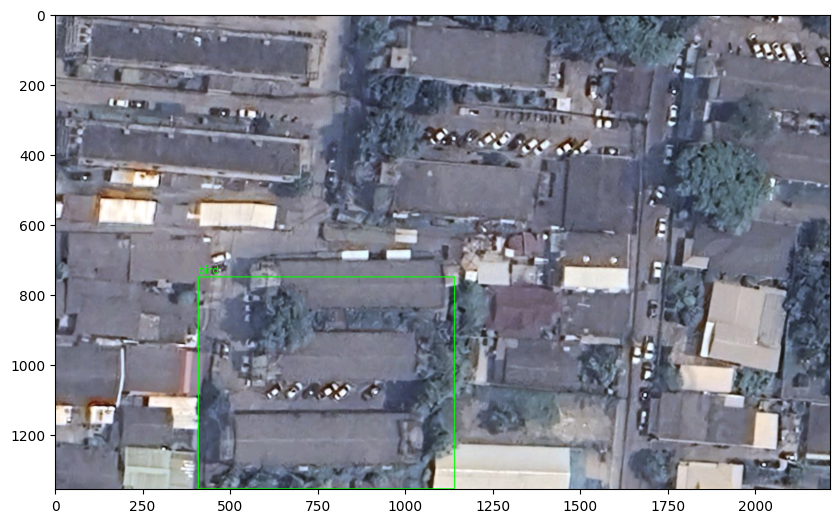

In [10]:
# visuallize results
for i in range(boxes.shape[1]):
    if scores[0, i] > 0.5:
        ymin = int(boxes[0, i, 0] * image_rgb.shape[0])
        xmin = int(boxes[0, i, 1] * image_rgb.shape[1])
        ymax = int(boxes[0, i, 2] * image_rgb.shape[0])
        xmax = int(boxes[0, i, 3] * image_rgb.shape[1])
        cv2.rectangle(image_rgb, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        
        # show class index
        # cv2.putText(image_rgb, str(classes[0, i]), (xmin, ymin), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # show class name
        cv2.putText(image_rgb, class_names[classes[0, i] - 1], (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 1,
                    (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.show()